In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import bls
sp = pd.read_csv('new_s_p_500.csv')

<AxesSubplot:>

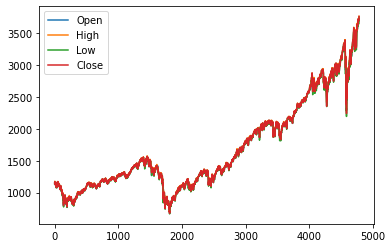

In [2]:
sp.plot()

As we can see, we have some issue with the date label, we see vertiginious plunge for no reason. We will reformat the date column first.

First, we need to change the datatype to a date type and then format it like usual

In [5]:
sp["Date"] = sp["Date"].astype("datetime64[ns]")
sp['Date'] = sp['Date'].dt.strftime('%Y-%m-%d')

Now we will only take a report of the stock every 3 months rather than everyday

In [6]:
sp['Date'] = sp['Date'].str.replace('-03-30', 'Q1')
sp['Date'] = sp['Date'].str.replace('-06-30', 'Q2')
sp['Date'] = sp['Date'].str.replace('-09-30', 'Q3')
sp['Date'] = sp['Date'].str.replace('-12-31', 'Q4')
sp = sp[(sp.Date.str.contains('Q') == True)]
sp1 = sp[['Date', 'Close']]

E:\Temp Files\Temp\ipykernel_27084\1339194036.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sp1.Date, rotation=45)


Text(0.5, 0, 'Dates')

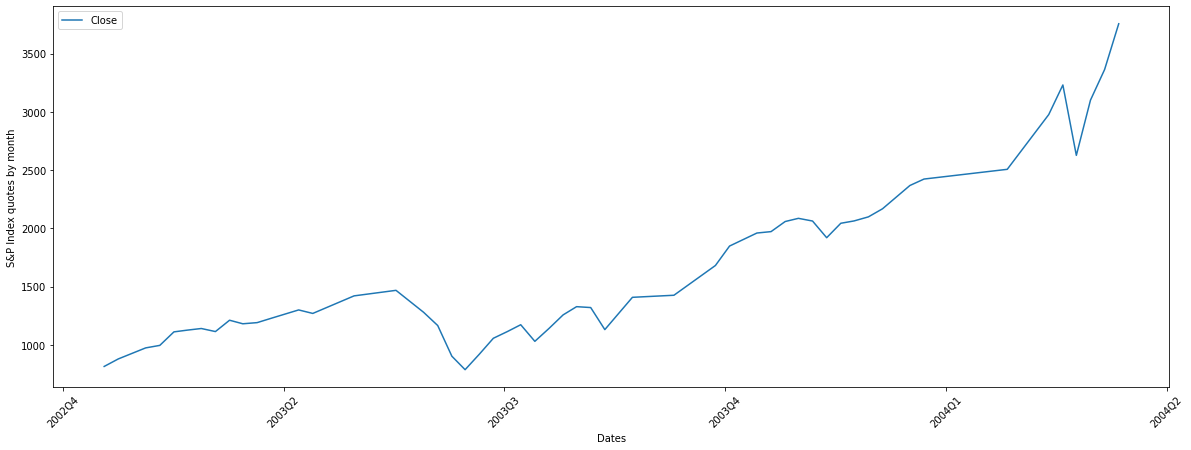

In [9]:
ax = sp1.plot(kind='line', figsize=(20, 7))
ax.set_xticklabels(sp1.Date, rotation=45)
ax.set_ylabel('S&P Index quotes by month')
ax.set_xlabel('Dates')

Now we will calculate the Rate of Increase

In [10]:
first = 815.28
last = 3756.07
periods = 20
def CAGR(first, last, periods):
    return (last/first)**(1/periods)-1
print ('The S&P had a CAGR of {:.2%} '.format(CAGR(\
first, last, periods)))

first = 178.8
last = 260.28
periods = 20
def CAGR(first, last, periods):
    return (last/first)**(1/periods)-1
print ('The Consumer Price Index had a CAGR of {:.2\
%}'.format(CAGR(first, last, periods)))

first = 178.64
last = 281.31
periods = 20
def CAGR(first, last, periods):
    return (last/first)**(1/periods)-1
print ('Wages had a CAGR of {:.2%} '.format(CAGR(first, last, periods)))

The S&P had a CAGR of 7.94% 
The Consumer Price Index had a CAGR of 1.90%
Wages had a CAGR of 2.30% 
